In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [23]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8

In [3]:
df =  pd.read_csv('segmentation data.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


<AxesSubplot:xlabel='Sex', ylabel='Income'>

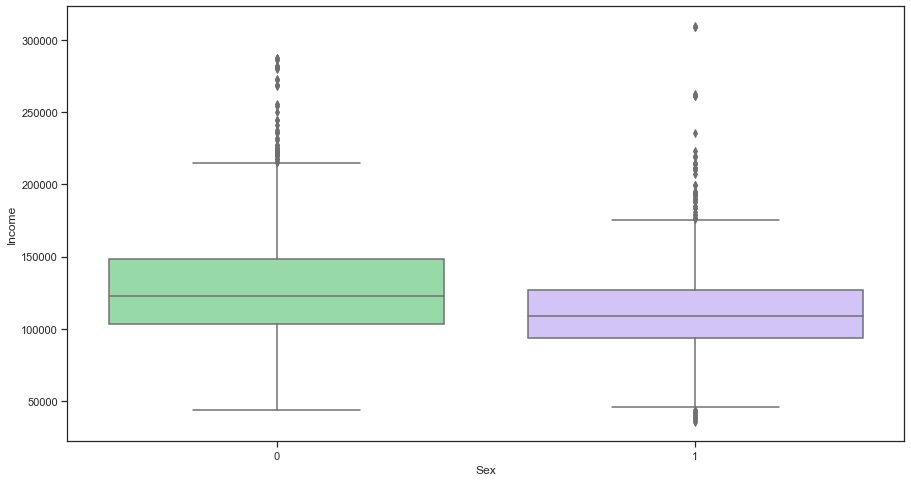

In [25]:
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="Sex", y="Income",
             palette=["g", "m"],
             data=df)


<AxesSubplot:xlabel='Age', ylabel='Income'>

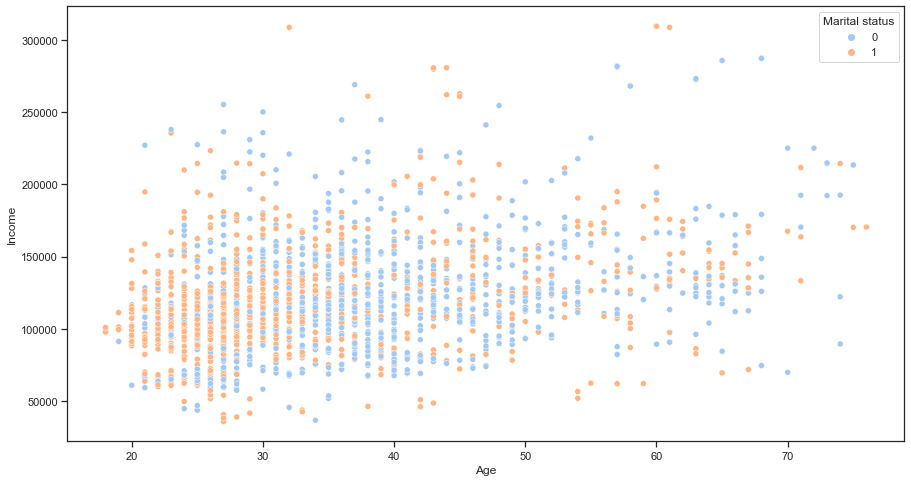

In [28]:
sns.scatterplot(x = 'Age',y = 'Income',data=df,hue='Marital status')
# sns.scatterplot(x="carat", y="price",
#                 hue="clarity", size="depth",
#                 palette="ch:r=-.2,d=.3_r",
#                 hue_order=clarity_ranking,
#                 sizes=(1, 8), linewidth=0,
#                 data=diamonds, ax=ax)

In [29]:
df.groupby('Marital status')['ID'].count()
#Marital status doesnt seem that important here

Marital status
0    1007
1     993
Name: ID, dtype: int64

Text(0.5, 1.0, 'Marital statusagainst income')

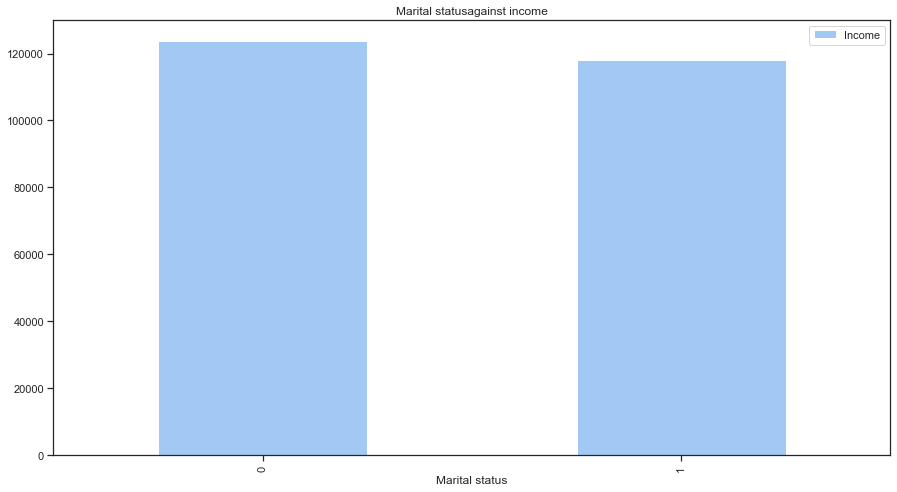

In [59]:
df.groupby('Marital status')['Income'].mean().plot(kind='bar',legend= True)
plt.title('Marital statusagainst income')

Text(0.5, 1.0, 'Settlement size against Income by Gender')

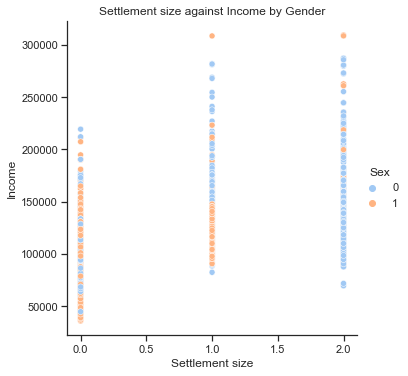

In [46]:
sns.relplot(x = 'Settlement size',y='Income',hue='Sex',data=df)
plt.title('Settlement size against Income by Gender')

Text(0.5, 1.0, 'Education Status against income')

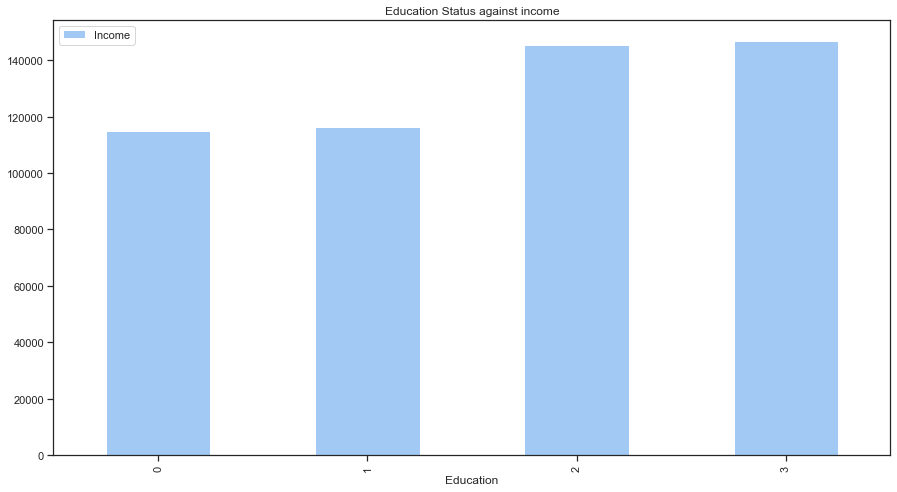

In [54]:
df.groupby('Education')['Income'].mean().plot(kind='bar',legend= True)
plt.title('Education Status against income')

Text(0.5, 1.0, 'Occupation against income')

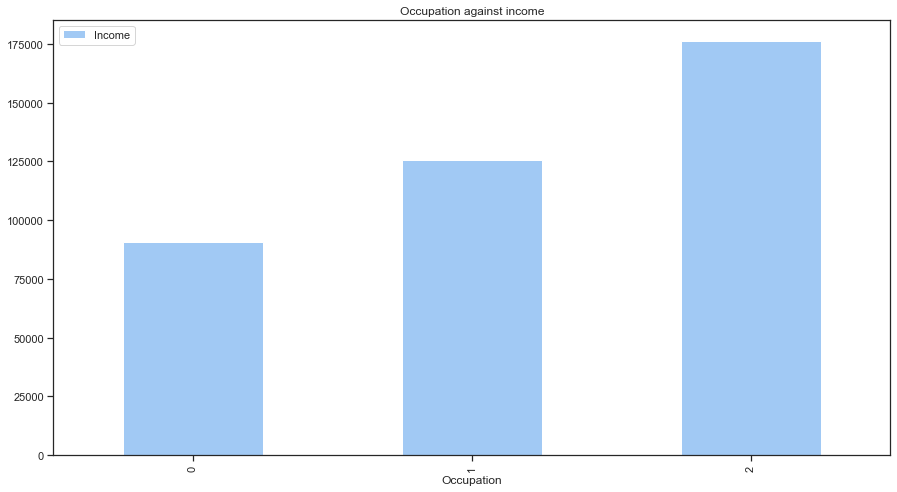

In [55]:
df.groupby('Occupation')['Income'].mean().plot(kind='bar',legend= True)
plt.title('Occupation against income')

In [67]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


## Attempt to classify by K-means and using Elbow method on the best number of groups

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

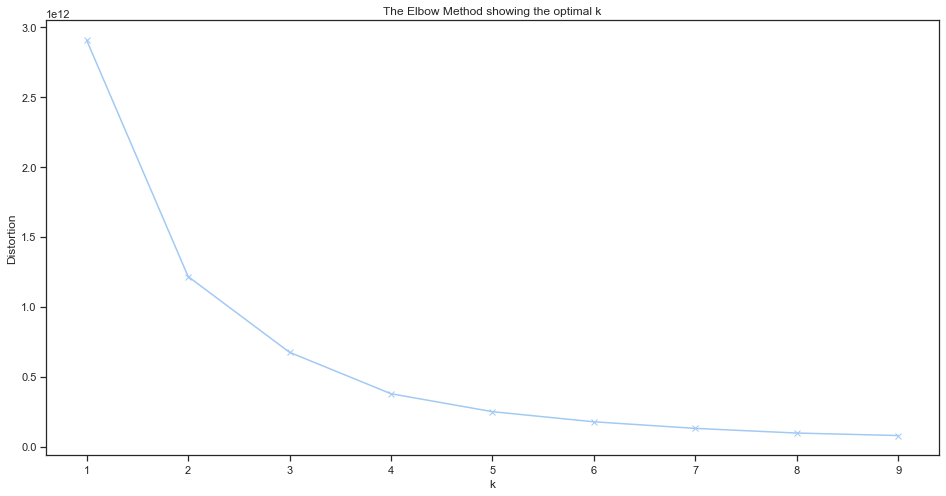

In [95]:
distortions = []

K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

In [102]:
#Attempt to cluster by 3
kmeans = KMeans(n_clusters=3)

In [103]:
kmeans.fit(df.drop(columns = ['ID','Marital status']))

KMeans(n_clusters=3)

In [104]:
clus_cent=kmeans.cluster_centers_
clus_cent

array([[ 2.95774648e-01,  4.39342723e+01,  1.35680751e+00,
         1.99404446e+05,  1.59154930e+00,  1.37558685e+00,
         1.00000000e+00],
       [ 5.69506726e-01,  3.19428251e+01,  9.20403587e-01,
         9.09065404e+04,  4.34977578e-01,  3.69955157e-01,
        -1.11022302e-16],
       [ 3.83240223e-01,  3.79519553e+01,  1.07932961e+00,
         1.32231349e+05,  9.98882682e-01,  9.55307263e-01,
         3.30726257e-01]])

In [105]:
#Center of the asteroids for K-means
feat = list(df.drop(columns = ['ID','Marital status']).columns)
kmclus = pd.DataFrame(clus_cent,columns=feat)
kmclus

,Sex,Age,Education,Income,Occupation,Settlement size,Labels
0,0.295775,43.934272,1.356808,199404.446009,1.591549,1.375587,1.000000e+00
1,0.569507,31.942825,0.920404,90906.540359,0.434978,0.369955,-1.110223e-16
2,0.383240,37.951955,1.079330,132231.348603,0.998883,0.955307,3.307263e-01


## Create Labels into dataset

In [106]:
df['Labels'] = kmeans.labels_


## Oberserve the segregation

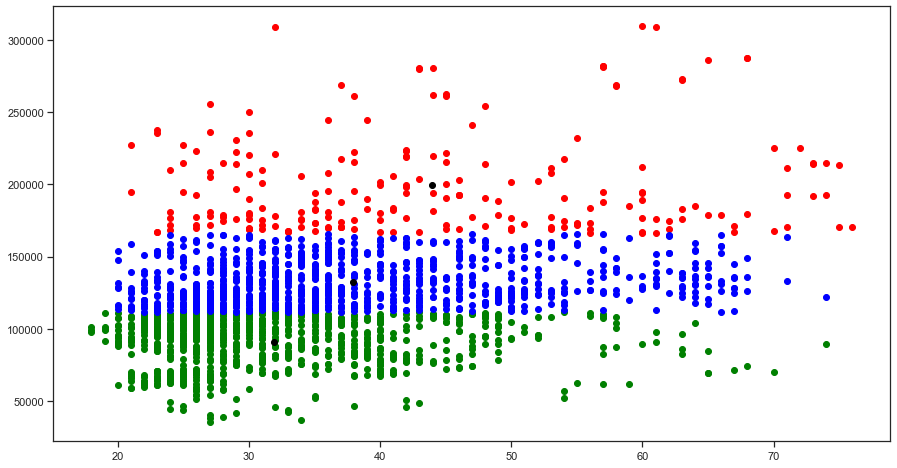

In [107]:
plt.scatter(x = df[df['Labels'] == 0]['Age'],y = df[df['Labels'] == 0]['Income'],color = 'red')

plt.scatter(x = df[df['Labels'] == 1]['Age'],y = df[df['Labels'] == 1]['Income'],color = 'green')

plt.scatter(x = df[df['Labels'] == 2]['Age'],y = df[df['Labels'] == 2]['Income'],color = 'blue')

plt.scatter(x = 'Age', y = 'Income',data = kmclus,color = 'black') # this is the centroid

## Label 0

In [132]:
df[df['Labels'] == 0].describe()

#tend to have high income

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Labels
count,2.130000e+02,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.0
mean,1.000007e+08,0.295775,0.460094,43.934272,1.356808,199404.446009,1.591549,1.375587,0.0
std,3.709614e+02,0.457465,0.499579,14.274446,0.773630,34039.422995,0.547140,0.651388,0.0
min,1.000000e+08,0.000000,0.000000,21.000000,0.000000,166264.000000,0.000000,0.000000,0.0
25%,1.000003e+08,0.000000,0.000000,32.000000,1.000000,172957.000000,1.000000,1.000000,0.0
50%,1.000008e+08,0.000000,0.000000,42.000000,1.000000,188594.000000,2.000000,1.000000,0.0
75%,1.000010e+08,1.000000,1.000000,55.000000,2.000000,214620.000000,2.000000,2.000000,0.0
max,1.000013e+08,1.000000,1.000000,76.000000,3.000000,309364.000000,2.000000,2.000000,0.0


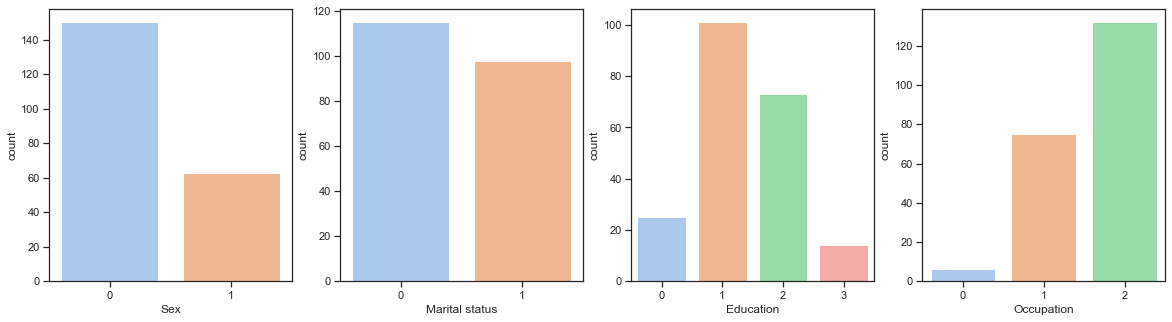

In [134]:

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# for i in range(4):
#     sns.countplot(ax=ax[i], x=new_discrete_features[i], data=data, hue='Sex')
    
features = ['Sex','Marital status','Education','Occupation']

for i in range(0,4):
    sns.countplot(ax=ax[i], x=features[i], data = df[df['Labels'] == 0])

                 ID         Sex  Marital status         Age   Education  \
count  8.910000e+02  891.000000      891.000000  891.000000  891.000000   
mean   1.000012e+08    0.569024        0.554433   31.953984    0.920314   
std    6.101296e+02    0.495491        0.497307    9.339845    0.496439   
min    1.000000e+08    0.000000        0.000000   18.000000    0.000000   
25%    1.000006e+08    0.000000        0.000000   25.000000    1.000000   
50%    1.000014e+08    1.000000        1.000000   29.000000    1.000000   
75%    1.000017e+08    1.000000        1.000000   37.000000    1.000000   
max    1.000020e+08    1.000000        1.000000   74.000000    3.000000   

              Income  Occupation  Settlement size  Labels  
count     891.000000  891.000000       891.000000   891.0  
mean    90883.315376    0.434343         0.370370     1.0  
std     16332.442835    0.515936         0.676888     0.0  
min     35832.000000    0.000000         0.000000     1.0  
25%     80152.500000    

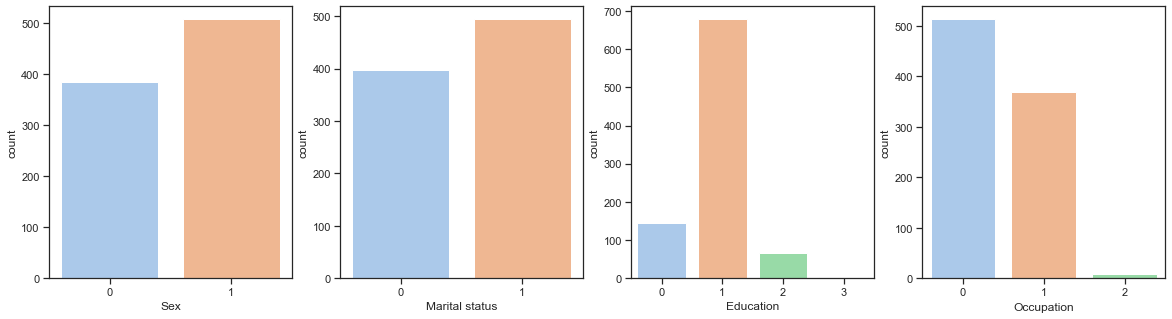

In [135]:
# These are the ppl labeled as one
print(df[df['Labels'] == 1].describe())

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    
features = ['Sex','Marital status','Education','Occupation']

for i in range(0,4):
    sns.countplot(ax=ax[i], x=features[i], data = df[df['Labels'] == 1])

In [113]:
df[df['Labels'] == 2].describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Labels
count,8.960000e+02,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.0
mean,1.000009e+08,0.383929,0.447545,37.934152,1.079241,132208.322545,0.998884,0.954241,2.0
std,5.373349e+02,0.486612,0.497519,11.693818,0.613966,14569.913174,0.503617,0.800226,0.0
min,1.000000e+08,0.000000,0.000000,20.000000,0.000000,111600.000000,0.000000,0.000000,2.0
25%,1.000005e+08,0.000000,0.000000,29.000000,1.000000,120388.500000,1.000000,0.000000,2.0
50%,1.000009e+08,0.000000,0.000000,35.000000,1.000000,128690.000000,1.000000,1.000000,2.0
75%,1.000013e+08,1.000000,1.000000,45.000000,1.000000,143326.500000,1.000000,2.000000,2.0
max,1.000020e+08,1.000000,1.000000,74.000000,3.000000,165717.000000,2.000000,2.000000,2.0


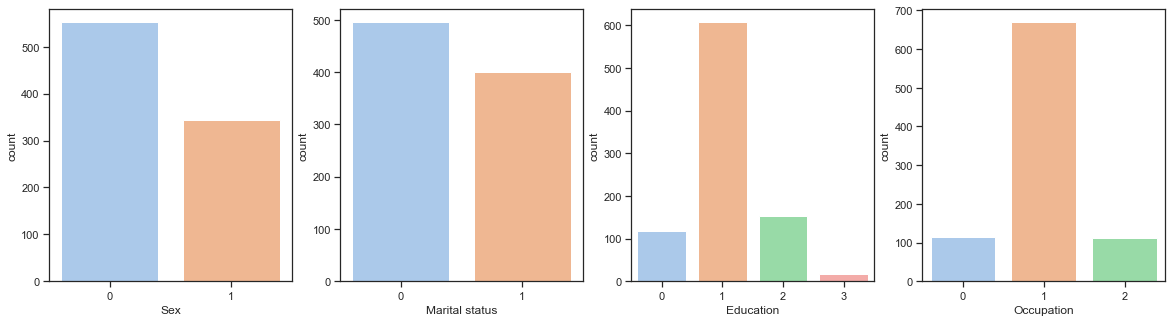

In [136]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for i in range(0,4):
    sns.countplot(ax=ax[i], x=features[i], data = df[df['Labels'] == 2])